In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)

In [3]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
data.tail()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


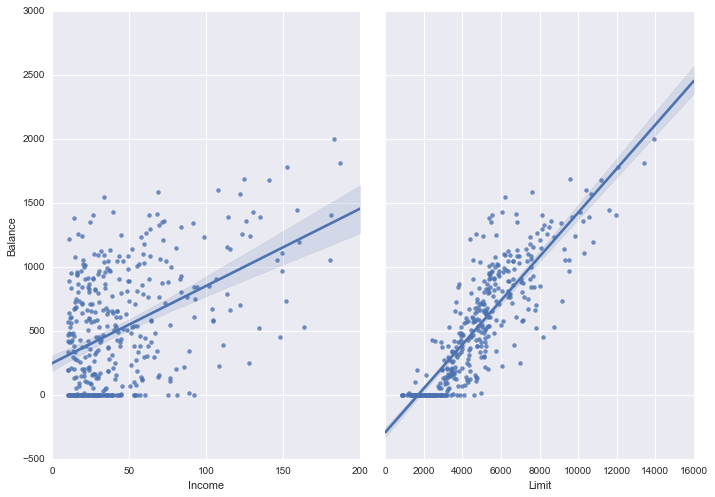

In [5]:
sns.pairplot(data, x_vars=['Income', 'Limit'], y_vars='Balance', size=7, aspect=0.7, kind='reg')

In [6]:
X=data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y=data['Balance']

In [7]:
#Lasso
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [8]:
n_lassos = 200
n_betas = 7

lassos = np.linspace(20,3500,n_lassos)
lassos[:10]

array([  20.        ,   37.48743719,   54.97487437,   72.46231156,
         89.94974874,  107.43718593,  124.92462312,  142.4120603 ,
        159.89949749,  177.38693467])

In [9]:
betas = np.zeros((n_lassos,n_betas))
R2_test = np.zeros((n_lassos))
R2_train = np.zeros((n_lassos))
for i in range(n_lassos):
    # Fit model
    clf = linear_model.Lasso(alpha=lassos[i])
    clf.fit(X_train, Y_train)
    betas[i,1:] = clf.coef_
    betas[i,0] = clf.intercept_
    # Score test
    R2_train[i] = clf.score(X_train, Y_train)
    # Score Training
    R2_test[i] = clf.score(X_test, Y_test)


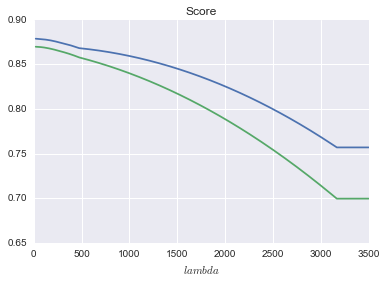

In [10]:
plt.plot(lassos,R2_train,label='train')
plt.plot(lassos,R2_test,label='test')
plt.title('Score')
plt.xlabel('$lambda$')

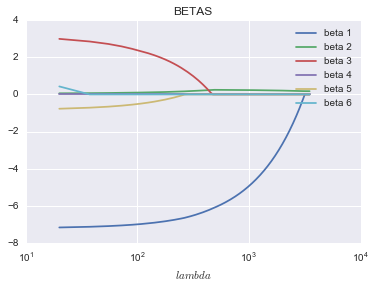

In [11]:
plt.semilogx(lassos,betas[:,1:])
plt.legend(["beta 1","beta 2","beta 3","beta 4","beta 5", "beta 6"])
plt.xlabel('$lambda$')
plt.title("BETAS")

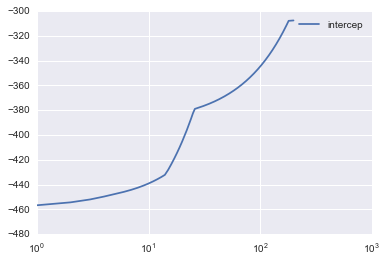

In [12]:
plt.semilogx(betas[:,0])
plt.legend(["intercep"])

In [13]:
# Scale data with the same cross validation groups

scaler1 = preprocessing.StandardScaler().fit(X_test)
X_test = scaler1.transform(X_test)
Y_test = (Y_test - np.mean(Y_test))/np.std(Y_test)
scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
Y_train = (Y_train - np.mean(Y_train))/np.std(Y_train)

print ("Mean of X,Y at train:", np.mean(X_train),np.mean(Y_train))
print ("Mean of X,Y at test:", np.mean(X_test),np.mean(Y_test))
print ("Std. deviation of X,Y at train:", np.std(X_train),np.std(Y_train))
print ("Std. deviation of X,Y at test:", np.std(X_test),np.std(Y_test))

Mean of X,Y at train: -6.06921920128e-17 -4.662936703425657e-17
Mean of X,Y at test: 7.54951656745e-17 -2.7755575615628915e-18
Std. deviation of X,Y at train: 1.0 0.9999999999999999
Std. deviation of X,Y at test: 1.0 1.0000000000000002


In [14]:
# Define again appropriate values of lambda
lassos = np.linspace(0.001,3,n_lassos)
betas = np.zeros((n_lassos,n_betas))
R2_test = np.zeros((n_lassos))
R2_train = np.zeros((n_lassos))
for i in range(n_lassos):
    # Fit model
    clf = linear_model.Lasso(alpha=lassos[i])
    clf.fit(X_train, Y_train)
    betas[i,1:] = clf.coef_
    betas[i,0] = clf.intercept_
    # Score test
    R2_train[i] = clf.score(X_train, Y_train)
    # Score Training
    R2_test[i] = clf.score(X_test, Y_test)
lassos[:10]

array([ 0.001     ,  0.01607035,  0.0311407 ,  0.04621106,  0.06128141,
        0.07635176,  0.09142211,  0.10649246,  0.12156281,  0.13663317])

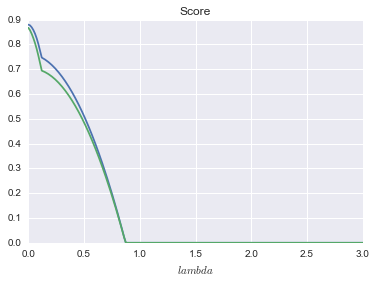

In [15]:
plt.plot(lassos,R2_train,label='train')
plt.plot(lassos,R2_test,label='test')
plt.title('Score')
plt.xlabel('$lambda$')

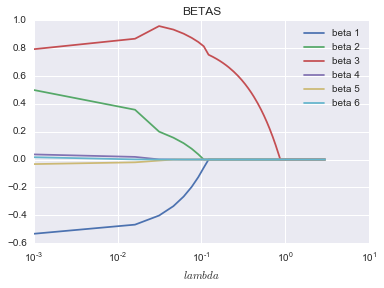

In [16]:
plt.semilogx(lassos,betas[:,1:])
plt.legend(["beta 1","beta 2","beta 3","beta 4","beta 5", "beta 6"])
plt.xlabel('$lambda$')
plt.title("BETAS")

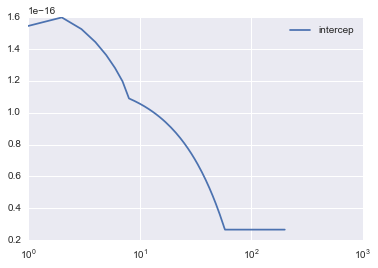

In [17]:
plt.semilogx(betas[:,0])
plt.legend(["intercep"])

In [18]:
# Scale all data 

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Y = (Y - np.mean(Y))/np.std(Y)
scaler = preprocessing.StandardScaler().fit(X)

print ("Mean of X,Y:", np.mean(X),np.mean(Y))
print ("Std. deviation of X,Y:", np.std(X),np.std(Y))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)


Mean of X,Y: 7.06841992345e-17 4.246603069191224e-17
Std. deviation of X,Y: 1.0 0.9999999999999994


In [19]:
lassos = np.linspace(0.001,3,n_lassos)

betas = np.zeros((n_lassos,n_betas))
R2_test = np.zeros((n_lassos))
R2_train = np.zeros((n_lassos))
for i in range(n_lassos):
    # Fit model
    clf = linear_model.Lasso(alpha=lassos[i])
    clf.fit(X_train, Y_train)
    betas[i,1:] = clf.coef_
    betas[i,0] = clf.intercept_
    # Score test
    R2_train[i] = clf.score(X_train, Y_train)
    # Score Training
    R2_test[i] = clf.score(X_test, Y_test)


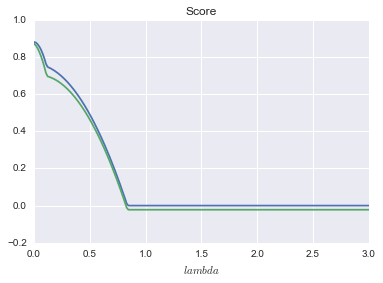

In [20]:
plt.plot(lassos,R2_train,label='train')
plt.plot(lassos,R2_test,label='test')
plt.title('Score')
plt.xlabel('$lambda$')

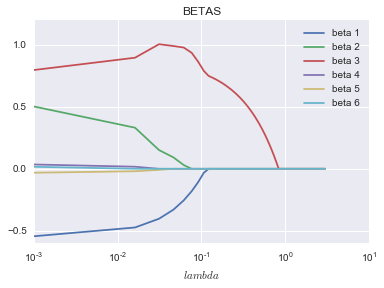

In [21]:
plt.semilogx(lassos,betas[:,1:])
plt.legend(["beta 1","beta 2","beta 3","beta 4","beta 5", "beta 6"])
plt.xlabel('$lambda$')
plt.title("BETAS")

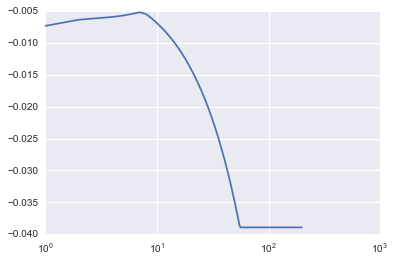

In [22]:
plt.semilogx(betas[:,0])

We can see that lambda = 0.5 is a good value for this model.

